In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.tree as tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split
import graphviz
%matplotlib inline

C:\Users\jesus\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


ModuleNotFoundError: No module named 'graphviz'

In [3]:
dfile = 'data/2015.csv'
df = pd.read_csv(dfile)

In [4]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


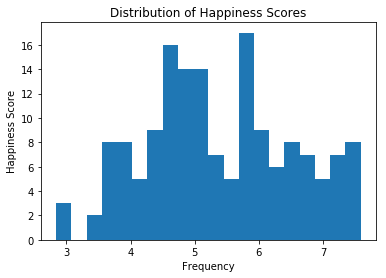

In [5]:
# Ex
plt.hist(df['Happiness Score'], bins=20)
plt.title('Distribution of Happiness Scores')
plt.ylabel('Happiness Score')
plt.xlabel('Frequency')
plt.show()

In [6]:
df.groupby('Region')['Happiness Score'].std()

Region
Australia and New Zealand          0.001414
Central and Eastern Europe         0.570446
Eastern Asia                       0.554053
Latin America and Caribbean        0.728560
Middle East and Northern Africa    1.101382
North America                      0.217789
Southeastern Asia                  0.950020
Southern Asia                      0.570526
Sub-Saharan Africa                 0.609557
Western Europe                     0.824582
Name: Happiness Score, dtype: float64

In [7]:
df.groupby('Region')['Standard Error'].mean()

Region
Australia and New Zealand          0.037270
Central and Eastern Europe         0.045208
Eastern Asia                       0.037225
Latin America and Caribbean        0.061127
Middle East and Northern Africa    0.046337
North America                      0.036960
Southeastern Asia                  0.042691
Southern Asia                      0.032161
Sub-Saharan Africa                 0.055299
Western Europe                     0.037625
Name: Standard Error, dtype: float64

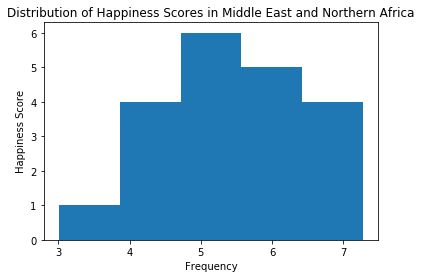

In [8]:
plt.hist(df[df.Region == 'Middle East and Northern Africa']['Happiness Score'], bins = 5)
plt.title('Distribution of Happiness Scores in Middle East and Northern Africa')
plt.ylabel('Happiness Score')
plt.xlabel('Frequency')
plt.show()

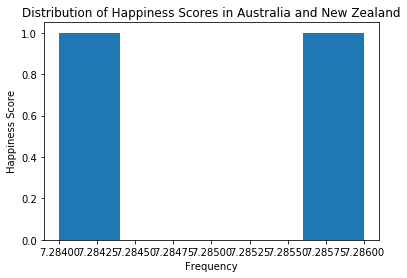

In [9]:
plt.hist(df[df.Region == 'Australia and New Zealand']['Happiness Score'], bins = 5)
plt.title('Distribution of Happiness Scores in Australia and New Zealand')
plt.ylabel('Happiness Score')
plt.xlabel('Frequency')
plt.show()

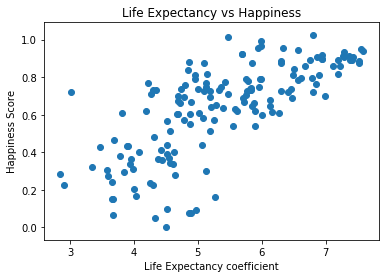

In [10]:
plt.scatter(df['Happiness Score'], df['Health (Life Expectancy)'])
plt.title('Life Expectancy vs Happiness')
plt.xlabel('Life Expectancy coefficient') # units unclear...
plt.ylabel('Happiness Score')
plt.show()

In [11]:
def get_scatter(feature):
    plt.scatter(df['Happiness Score'], df[feature])
    plt.title(feature + ' vs Happiness')
    plt.xlabel(feature +' coefficient') # units unclear...
    plt.ylabel('Happiness Score')
    return plt.show()

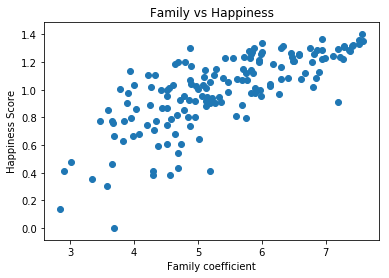

In [12]:
get_scatter('Family')

In [13]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [14]:
features = ['Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual']

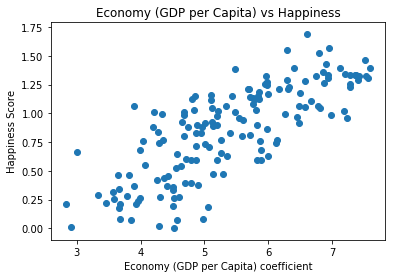

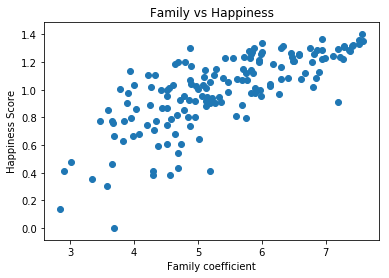

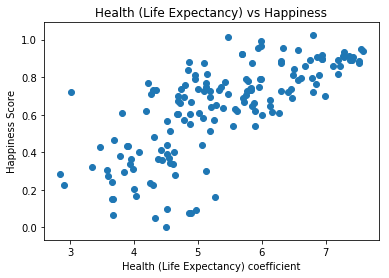

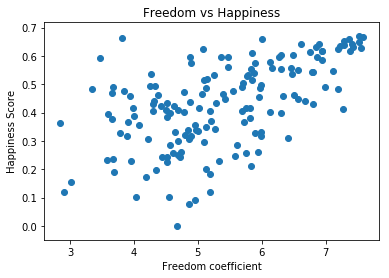

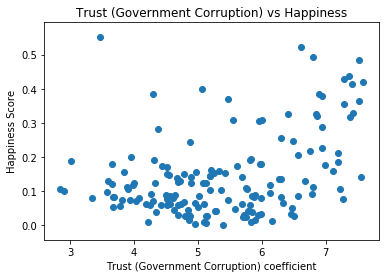

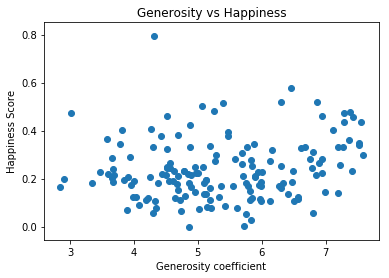

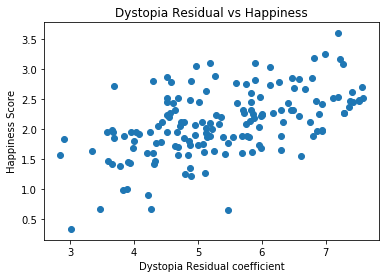

In [15]:
for feature in features:
    get_scatter(feature)

In [17]:
df.Region.unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [18]:
df['In Europe'] = df['Region'].apply(lambda x: 'Europe' in x)

In [19]:
df.drop(['Region', 'Happiness Rank'], axis=1, inplace=True)
df.head()

,Country,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,In Europe
0,Switzerland,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,True
1,Iceland,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,True
2,Denmark,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,True
3,Norway,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,True
4,Canada,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,False


In [20]:
countries = df['Country'] # useful later for reindexing
X = df.drop(['In Europe', 'Country'], axis=1)
Y = df['In Europe']
test_size = 0.3 # you can adjust this
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_size)

In [37]:
knn_bis = KNeighborsClassifier(n_neighbors=10, metric='minkowski', metric_params={'p': 3})

C:\Users\jesus\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  """Entry point for launching an IPython kernel.


In [60]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
knn.predict(x_test)

array([ True, False, False, False, False,  True, False, False,  True,
       False, False, False, False, False,  True, False, False, False,
        True,  True, False, False,  True,  True, False, False, False,
        True, False,  True, False, False, False, False, False,  True,
       False, False,  True, False, False, False,  True,  True, False,
       False,  True, False], dtype=bool)

In [31]:
y_test

44      True
114    False
89     False
143    False
78     False
74     False
40     False
118    False
2       True
79      True
56     False
69      True
60     False
27     False
23     False
107    False
26     False
145    False
85      True
59      True
150    False
137    False
72      True
111    False
51      True
30      True
98     False
4      False
147    False
113    False
125    False
103     True
41     False
8      False
123    False
106    False
80     False
73     False
87      True
101     True
116    False
119    False
36      True
14     False
57     False
97     False
55      True
110     True
Name: In Europe, dtype: bool

In [32]:
type(knn.predict(x_test)[0])

numpy.bool_

In [139]:
def get_accuracy(predicted_array, observed_array):
    correct_predictions = 0
    for i in range(len(predicted_array)):
        if predicted_array[i] == observed_array.iloc[i]:
            correct_predictions +=1
    accuracy = correct_predictions/len(predicted_array)
    return round(accuracy, 2)

In [63]:
get_accuracy(knn.predict(x_test), y_test)

0.708

In [64]:
knn_bis.fit(x_train, y_train)
knn_bis.predict(x_test)

array([False, False, False, False, False, False, False, False,  True,
        True, False, False,  True,  True,  True,  True, False, False,
        True,  True, False, False,  True, False, False, False, False,
        True, False, False, False, False, False,  True, False,  True,
       False,  True, False,  True, False, False,  True,  True, False,
       False, False, False], dtype=bool)

In [65]:
get_accuracy(knn_bis.predict(x_test), y_test)

0.646

In [66]:
def knn_pred(data_set, k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    return knn.predict(data_set)

In [68]:
for i in range(1,21):
    print('k = {}, accuracy train = {}, accuracy test = {}'.format(i, get_accuracy(knn_pred(x_train, i), y_train), get_accuracy(knn_pred(x_test, i), y_test)))

k = 1, accuracy train = 1.0, accuracy test = 0.708
k = 2, accuracy train = 0.891, accuracy test = 0.708
k = 3, accuracy train = 0.873, accuracy test = 0.667
k = 4, accuracy train = 0.836, accuracy test = 0.646
k = 5, accuracy train = 0.809, accuracy test = 0.646
k = 6, accuracy train = 0.827, accuracy test = 0.604
k = 7, accuracy train = 0.818, accuracy test = 0.667
k = 8, accuracy train = 0.745, accuracy test = 0.667
k = 9, accuracy train = 0.773, accuracy test = 0.646
k = 10, accuracy train = 0.764, accuracy test = 0.604
k = 11, accuracy train = 0.755, accuracy test = 0.625
k = 12, accuracy train = 0.745, accuracy test = 0.646
k = 13, accuracy train = 0.745, accuracy test = 0.625
k = 14, accuracy train = 0.727, accuracy test = 0.646
k = 15, accuracy train = 0.736, accuracy test = 0.625
k = 16, accuracy train = 0.727, accuracy test = 0.625
k = 17, accuracy train = 0.727, accuracy test = 0.625
k = 18, accuracy train = 0.727, accuracy test = 0.625
k = 19, accuracy train = 0.736, accurac

In [86]:
knn.predict_proba(x_test)

array([[ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.]])

In [107]:
def get_accuracy_proba(proba_array, observed_array):
    correct_false = 0
    correct_true = 0
    false = 0
    true = 0
    for i in range(len(proba_array)):
        if observed_array.iloc[i] == False and proba_array[i][0] > 0.5:
            correct_false += 1
        elif observed_array.iloc[i] == True and proba_array[i][1] > 0.5:
            correct_true += 1
        if observed_array.iloc[i] == False:
            false += 1
        else:
            true += 1
    accuracy_false = round(correct_false / false, 2)
    accuracy_true = round(correct_true / true, 2)
    return accuracy_false, accuracy_true

In [108]:
get_accuracy_proba(knn.predict_proba(x_test), y_test)

(0.79, 0.53)

In [109]:
y_test.head()

44      True
114    False
89     False
143    False
78     False
Name: In Europe, dtype: bool

In [130]:
list(countries).index('Mexico')

13

In [124]:
len(knn.kneighbors(X, 5, False))

158

In [134]:
def find_neighbors(country, k):
    country_index = list(countries).index(country)
    neighbors_list = knn.kneighbors(X, k, False)
    neighbors_names = []
    for i in neighbors_list[country_index]:
        neighbors_names.append(countries[i])
    return neighbors_names

In [135]:
find_neighbors('Mexico', 5)

['Kyrgyzstan', 'Jamaica', 'Iran', 'Spain', 'Portugal']

In [136]:
find_neighbors('Switzerland', 5)

['Qatar', 'Panama', 'Sweden', 'Singapore', 'Costa Rica']

In [137]:
find_neighbors('United States', 5)

['Mauritius', 'Estonia', 'Costa Rica', 'Lesotho', 'Singapore']

In [138]:
knn_m = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
knn_m.fit(x_train, y_train)
knn_m.predict(x_test)

array([ True, False, False, False, False,  True, False, False,  True,
       False, False, False, False, False,  True, False, False, False,
        True,  True, False, False,  True,  True, False, False, False,
        True, False, False, False, False, False,  True, False, False,
       False, False, False,  True, False, False,  True,  True, False,
        True,  True, False], dtype=bool)

In [140]:
get_accuracy(knn_m.predict(x_test), y_test)

0.71

In [141]:
get_accuracy(knn_m.predict(x_train), y_train)

0.89

In [142]:
knn_w = KNeighborsClassifier(n_neighbors=3, weights = 'distance')
knn_w.fit(x_train, y_train)
knn_w.predict(x_test)

array([ True, False, False, False, False, False,  True, False,  True,
       False, False, False, False,  True,  True, False, False, False,
        True,  True, False, False,  True,  True, False, False, False,
        True, False, False, False, False, False,  True, False,  True,
       False, False, False,  True, False, False, False,  True, False,
       False,  True, False], dtype=bool)

In [143]:
get_accuracy(knn_w.predict(x_test), y_test)

0.67

In [144]:
get_accuracy(knn_w.predict(x_train), y_train)

1.0